In [1]:
import numpy
from sympy import *

In [6]:
def telescoping_method(function, point, n_t, precision):
    x = Symbol('x')
    a = point - 1
    b = point + 1
    polynomial = series(function, x, x0=0, n=n_t).removeO()
    chebyshev = LC(polynomial)*(b - a)**n_t/2**(2*n_t-1)*chebyshevt(n_t, (2*x+a+b)/(b-a))
    chebyshevN = lambdify(x, chebyshev, 'numpy')(point)
    while abs(chebyshevN) < precision:
        polynomial = polynomial - chebyshev
        n_t -= 1
        chebyshev = LC(polynomial)*(b - a)**n_t/2**(2*n_t-1)*chebyshevt(n_t, (2*x+a+b)/(b-a))
        chebyshevN = lambdify(x, chebyshev, 'numpy')(point)
    polynomialN = lambdify(x, polynomial, 'numpy')(point)
    return {"value": polynomialN, "degree": n_t}

In [7]:
def telescoping_method_list(function, points, n_t, precision):
    return [telescoping_method(function, point, n_t, precision)["value"] for point in points]

In [8]:
x = Symbol('x')
function = ln(1+x)
point = 0
n_t = 15
precision = 0.0001
telescope = telescoping_method(function, point, n_t, precision)
telescope

{'value': -2.6157924107142856e-05, 'degree': 10}

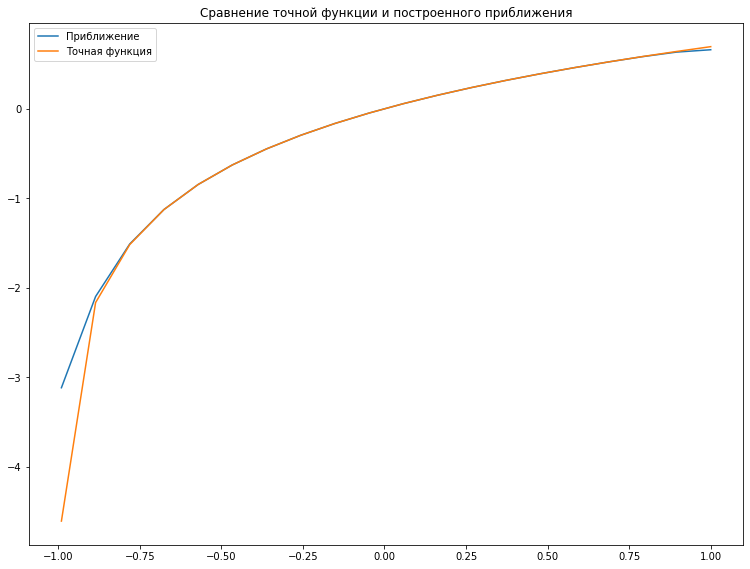

In [9]:
import matplotlib.pyplot as plt
import numpy as np
space = np.linspace(-0.99, 1, 20)
plt.figure(figsize=(12.8, 9.6))
plt.title('Сравнение точной функции и построенного приближения')
plt.plot(space, telescoping_method_list(function, space, n_t, precision), label='Приближение')
plt.plot(space, lambdify(x, ln(1+x), 'numpy')(space), label='Точная функция')
plt.legend()
plt.show()